<a href="https://colab.research.google.com/github/srivatsan88/Deep-Learning-Computer-Vision/blob/master/Rock_paper_scissor_classifier_using_Deep_AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deep_autoviml --upgrade

In [ ]:
import tensorflow as tf
from IPython.display import Image, display

import matplotlib.pyplot as plt
import tensorflow_hub as hub

import numpy as np

from deep_autoviml import deep_autoviml as deepauto

import warnings
warnings.filterwarnings('ignore')


Imported deep_auto_viml. version=0.0.28
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="auto",
		project_name="deep_autoviml", keras_options={}, model_options={}, 
		save_model_flag=True, use_my_model='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
!nvidia-smi

Thu Jun  3 01:26:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |    224MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-03 01:09:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.17MB/s    in 3m 46s  

2021-06-03 01:13:31 (1.36 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [ ]:
!ls rockpaperscissors/test

paper  rock  scissors


In [ ]:
!mkdir rockpaperscissors/train

In [ ]:
!rm rockpaperscissors/README_rpc-cv-images.txt
!mv rockpaperscissors/paper rockpaperscissors/train/paper
!mv rockpaperscissors/rock rockpaperscissors/train/rock
!mv rockpaperscissors/scissors rockpaperscissors/train/scissors
!mv rockpaperscissors/rps-cv-images rockpaperscissors/test
!rm rockpaperscissors/test/README_rpc-cv-images.txt

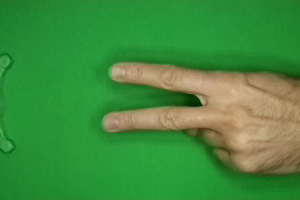

In [ ]:
display(Image('rockpaperscissors/train/scissors/KNNsNhduqSfuqEK5.png'))

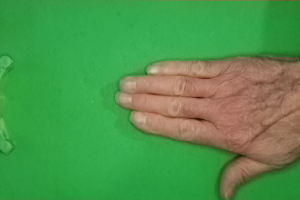

In [ ]:
display(Image('rockpaperscissors/test/paper/9zuFLFklb0ibEelE.png'))

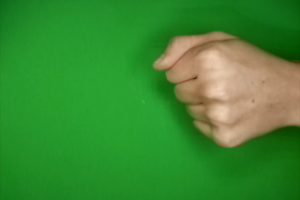

In [ ]:
display(Image('rockpaperscissors/test/rock/JOaPrPIINVvoI9l4.png'))

In [ ]:
image_dir = '/content/rockpaperscissors/'
img_height = 224
img_width = 224
img_channels = 3

In [ ]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True,
                 'image_directory': image_dir, 'image_height': img_height,
                 'image_width':img_width, 'image_channels':img_channels }

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
For image use case:
    Image directory given as /content/rockpaperscissors/
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/rockpaperscissors/. Returning...
Found 2188 files belonging to 3 classes.

Splitting train into two: train and validation data
Number of image classes = 3 and they are: ['paper', 'rock', 'scissors']
Training image model. This will take time...
Epoch 1/3
17/17 [==============================] - 44s 464ms/step - loss: 0.9067 - accuracy: 0.5781 - val_loss: 0.3817 - val_accuracy: 0.9018
Epoch 2/3
17/17 [==============================] - 2s 106ms/step - loss: 0.2900 - accuracy: 0.9154 - val_loss: 0.1861 - val_accuracy: 0.9397
Epoch 3/3
7/7 [==============================] - 1s 70ms/step - loss: 0.1254 - accu

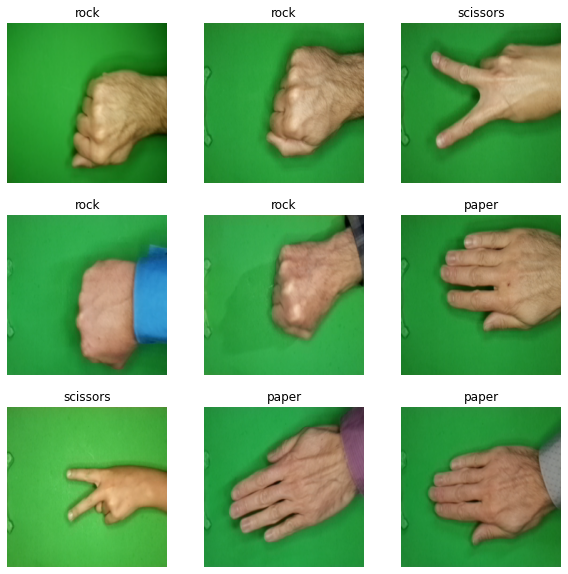

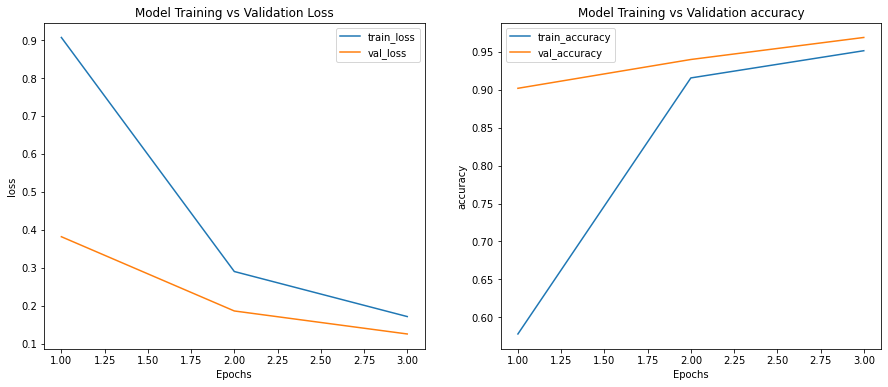


Model not being saved since save_model_flag set to False...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
None


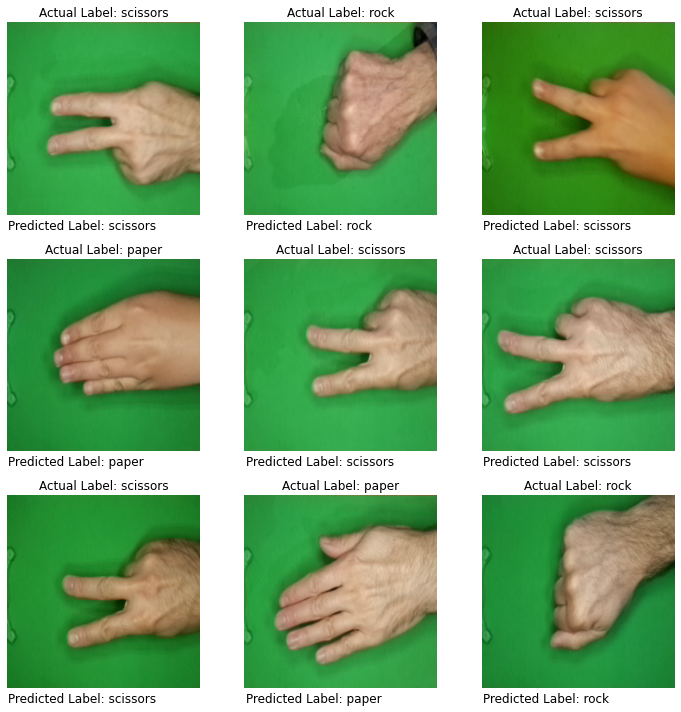

In [ ]:
model, dicti = deepauto.fit("", "", keras_model_type=keras_model_type,
                            project_name='rock_classifier',
                            save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=0)

In [ ]:
predictions=deepauto.predict_images(image_dir, model, cat_vocab_dict=dicti)


Using <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa0721671d0> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/rockpaperscissors/
Found 4376 files belonging to 2 classes.
    Sample predictions before inverse_transform: [0 1 2 0 2]
    Sample predictions after inverse_transform: ['paper' 'rock' 'scissors' 'paper' 'scissors']


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('rockpaperscissors/test',
  seed=111,
  image_size=(img_height, img_width),
  batch_size=128)

Found 2188 files belonging to 3 classes.


In [ ]:
model.evaluate(test_ds)

18/18 [==============================] - 6s 180ms/step - loss: 0.1108 - accuracy: 0.9762


[0.1107846274971962, 0.9762340188026428]

In [ ]:
model.save('./models', save_format='tf')

In [ ]:
!ls models

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
model_loaded = tf.keras.models.load_model('./models/')

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [ ]:
pred_label=model_loaded.predict(process('rockpaperscissors/test/rock/JOaPrPIINVvoI9l4.png'))

In [ ]:
pred_label

array([[0.087, 0.825, 0.088]], dtype=float32)

In [ ]:
classes = ['paper', 'rock', 'scissors']

In [ ]:
print(classes[np.argmax(pred_label)])

rock
